Imports

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath('..'))
from src.preprocessing import clean_credit_data

**Read the CSV file and clean the dataset. We change incomes of personы which have NAN incomes by adding 0 income **

In [2]:
df = pd.read_csv('../data/raw/cs-training.csv', index_col=0)
df_clean = clean_credit_data(df)

**NAN check all must be 0**

In [3]:
df_clean.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [4]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

**The analysis of the highest incomes shows that some individuals earn exceptionally high amounts. However, these values appear to be realistic rather than erroneous. Therefore, we do not treat them as anomalies and no cleaning is required in this regard.**

In [5]:
top_10_incomes = df_clean.sort_values(ascending=False, by='MonthlyIncome').copy().head(10)
top_10_incomes

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
73764,0,0.007328,52,0,0.001470,3008750.0,10,0,1,0,3
137141,0,0.000000,68,0,0.002776,1794060.0,15,0,1,0,0
111366,0,0.163856,44,0,0.004013,1560100.0,12,0,4,0,2
50641,0,0.469025,44,1,0.004537,1072500.0,9,0,2,0,1
122544,0,0.041599,55,0,0.000147,835040.0,8,0,0,0,0
123292,0,0.226333,67,1,0.005570,730483.0,23,0,1,0,0
93565,0,0.071628,50,0,0.008268,702500.0,12,0,4,0,2
96550,0,0.064155,52,0,0.003698,699530.0,11,0,2,0,1
119137,0,0.151329,49,0,0.001313,649587.0,8,0,0,1,3
37079,0,0.000000,83,0,0.000000,629000.0,3,0,0,0,0


**The top 10 smallest incomes show that many individuals report a monthly income of 0. This may indicate missing or unreported income rather than truly having no income, so these cases require further attention during preprocessing.**

In [6]:
top_10_smallest_incomes = df_clean.sort_values(ascending=True, by='MonthlyIncome').copy().head(10)
top_10_smallest_incomes

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
76741,0,0.000000,55,0,1051.0,0.0,8,0,2,0,0
126778,0,0.127021,40,0,164.0,0.0,12,0,0,0,0
149951,0,0.004827,61,0,1940.0,0.0,10,0,1,0,0
84837,0,0.069412,66,0,1081.0,0.0,9,0,1,0,0
26924,0,0.339088,33,0,3196.0,0.0,7,0,3,0,2
40582,0,0.017127,68,0,62.0,0.0,4,0,0,0,0
22985,0,0.854146,24,0,33.0,0.0,4,0,0,0,0
34858,0,0.004179,51,0,3780.0,0.0,5,0,1,0,1
15498,0,0.002636,64,0,21.0,0.0,5,0,0,0,0
53385,0,0.000000,22,0,0.0,0.0,2,0,0,0,0


**There are only about 1% of individuals with zero income in the dataset. Since this proportion is very small and such cases may represent unemployed or retired persons, we decide to keep them in the data without any modifications.**

In [7]:
zero_income = (df_clean['MonthlyIncome'] == 0).sum()
non_zero_income = (df_clean['MonthlyIncome'] != 0).sum()
percent_of_zero_income_persons = zero_income * 100 / len(df_clean)

print("Zero income persons:", zero_income)
print("Non-zero income persons:", non_zero_income)
print("Percent of zero income persons:", percent_of_zero_income_persons)

Zero income persons: 1634
Non-zero income persons: 148365
Percent of zero income persons: 1.0893405956039708


**Boxplot for outliers
Boxplot visualizes the median, quartiles, and potential outliers. 
It is useful to quickly spot extreme income values that could affect models.**

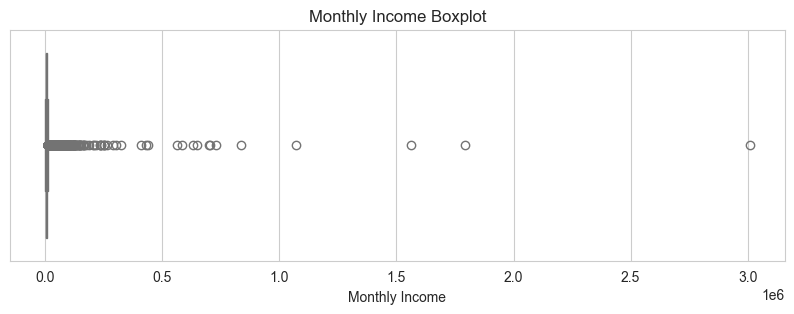

In [8]:
plt.figure(figsize=(10,3))
sns.boxplot(x=df_clean['MonthlyIncome'], color='lightgreen')
plt.title('Monthly Income Boxplot')
plt.xlabel('Monthly Income')
plt.show()

**Boxplot by default status
This boxplot compares income distributions between customers who defaulted (1) and those who did not (0).
Helps to visually assess if income might influence default probability.**

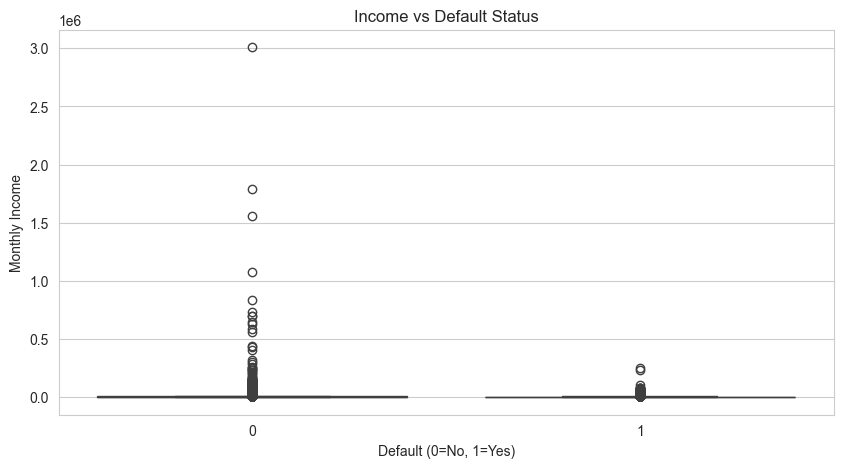

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(x='SeriousDlqin2yrs', y='MonthlyIncome', data=df_clean)
plt.title('Income vs Default Status')
plt.xlabel('Default (0=No, 1=Yes)')
plt.ylabel('Monthly Income')
plt.show()

**Log-transformed histogram
Income often has a long right tail (highly skewed). 
Log transformation (log1p = log(1 + x)) reduces skewness, making the distribution more normal-like. 
This can improve modeling performance for algorithms sensitive to outliers.**

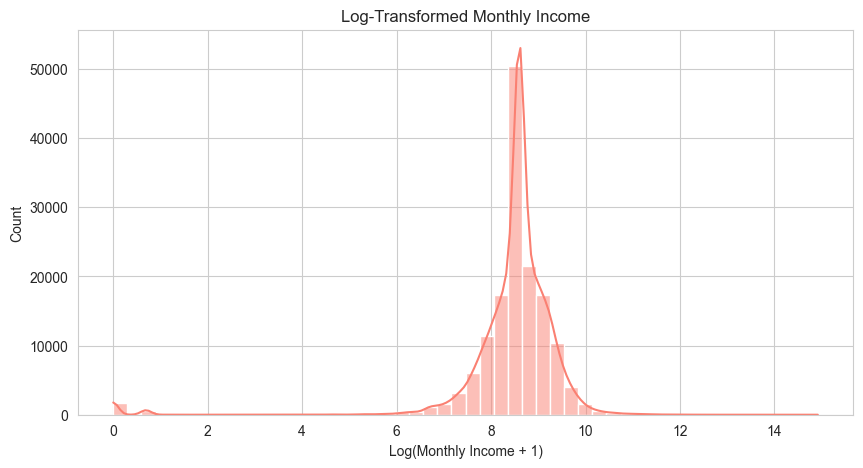

In [10]:
df_x = df_clean.copy()
df_x['MonthlyIncome'] = df_clean['MonthlyIncome'].copy().apply(lambda x: np.log1p(x))
plt.figure(figsize=(10,5))
sns.histplot(df_x['MonthlyIncome'], bins=50, kde=True, color='salmon')
plt.title('Log-Transformed Monthly Income')
plt.xlabel('Log(Monthly Income + 1)')
plt.ylabel('Count')
plt.show()

In [11]:
df_clean.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0
6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1
7,0,0.305682,57,0,5710.000000,5400.0,8,0,3,0,0
8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0
9,0,0.116951,27,0,46.000000,5400.0,2,0,0,0,0
10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2


**Now we go to analyse DebtRatio values**

In [17]:
top_10_highest_debtratio = df_clean.sort_values(ascending = False, by = 'DebtRatio').head(10)
top_10_lowest_debtratio = df_clean.sort_values(ascending = True, by = 'DebtRatio').head(10)
print("Mean:", df_clean['DebtRatio'].mean())
print("Median:", df_clean['DebtRatio'].median())
print("95th percentile:", df_clean['DebtRatio'].quantile(0.95))
print("99th percentile:", df_clean['DebtRatio'].quantile(0.99))

Mean: 353.00742623386355
Median: 0.366503221
95th percentile: 2449.0
99th percentile: 4979.079999999958


In [19]:
df_copy = df_clean.copy()
df_copy['DebtRatio_clipped'] = df_clean['DebtRatio'].clip(upper=df['DebtRatio'].quantile(0.99))
print("Mean:", df_copy['DebtRatio_clipped'].mean())
print("Median:", df_copy['DebtRatio_clipped'].median())
print("95th percentile:", df_copy['DebtRatio_clipped'].quantile(0.95))
print("99th percentile:", df_copy['DebtRatio_clipped'].quantile(0.99))

Mean: 316.5509765241992
Median: 0.366503221
95th percentile: 2449.0
99th percentile: 4979.000800000001


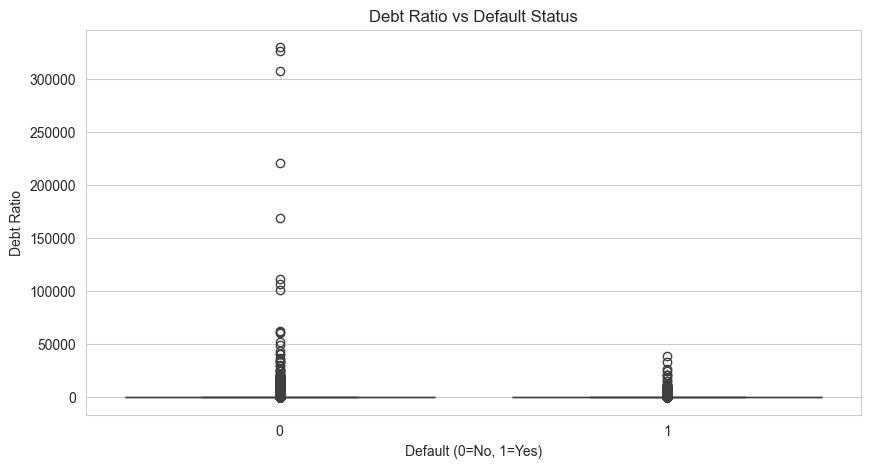

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(x='SeriousDlqin2yrs', y='DebtRatio', data=df_clean)
plt.title('Debt Ratio vs Default Status')
plt.xlabel('Default (0=No, 1=Yes)')
plt.ylabel('Debt Ratio')
plt.show()

**We can see that there are outliers on the graph, so we will apply a logarithmic transformation to all the data for training to reduce the impact of large values.**